In [161]:
# Data Cleaning

In [163]:
import pandas as pd
import numpy as np

# Unprocessed values. Metagenomic data CSV file
data = pd.read_csv("Data_phython.csv", encoding='UTF-8', delimiter=';')

# Identify columns where all values are zero
columns_with_all_zeros = data.columns[(data == 0).all(axis=0)]

# Remove columns where all values are zero
data_non_zero_columns = data.loc[:, (data != 0).any(axis=0)]

# Save the cleaned data to a new CSV file
data_non_zero_columns.to_csv("clean_results.csv", encoding='UTF-8', sep=';', index=False)

# Save the list of removed columns to a separate file
columns_with_all_zeros.to_series().to_csv("removed_columns.csv", encoding='UTF-8', sep=';', index=False, header=['Removed Columns'])

# Optional: Display messages indicating successful file generation
print("File '40_clean_results.csv' successfully generated with non-zero columns.")
print("File '40_removed_columns.csv' successfully generated with the list of removed columns.")

File '40_clean_results.csv' successfully generated with non-zero columns.
File '40_removed_columns.csv' successfully generated with the list of removed columns.


In [165]:
# Data Cleaning

In [167]:
# Step 1: Load the cleaned data
data = pd.read_csv("1_clean_results.csv", encoding='UTF-8', delimiter=';')

# Step 2: Define a function to replace zeros with the row median
def replace_zeros_with_row_median(row):
    median_value = row[row != 0].median()  # Calculate the median of non-zero values
    row[row == 0] = median_value  # Replace zeros with the row median
    return row

# Step 3: Apply the function to each row
data_transformed = data.apply(replace_zeros_with_row_median, axis=1)

# Step 4: Save the file with zeros replaced
output_file = "40_clean_results_median_filled.csv"
data_transformed.to_csv(output_file, encoding='UTF-8', sep=';', index=False)

# Step 5: Confirmation message
print(f"File '{output_file}' successfully generated with zeros replaced by the row median.")

File '40_clean_results_median_filled.csv' successfully generated with zeros replaced by the row median.


In [169]:
# sigmoid probabilities

In [171]:
# **Step 1:** Load the data from a CSV file
data = pd.read_csv("3_clean_results_median_filled.csv", encoding='UTF-8', delimiter=';')

# **Step 2:** Convert values to numeric (avoid errors due to text entries)
numeric_data = data.apply(pd.to_numeric, errors='coerce')

# **Step 3:** Define the sigmoid function
def sigmoid(vk):
    return 1 / (1 + np.exp(-vk))

# **Step 4:** Apply the sigmoid function to each cell in the DataFrame
probabilities = numeric_data.applymap(sigmoid)

# **Step 5:** Save the results to a CSV file
output_file = "40_sigmoid_probabilities.csv"
probabilities.to_csv(output_file, encoding='UTF-8', sep=';', index=False)

# **Success message**
print(f"✅ File '{output_file}' successfully generated with sigmoid probabilities.")

✅ File '40_sigmoid_probabilities.csv' successfully generated with sigmoid probabilities.


C:\Users\estef\AppData\Local\Temp\ipykernel_51740\790427507.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  probabilities = numeric_data.applymap(sigmoid)


In [173]:
# Shanoon entropy 

In [175]:
# **Step 1:** Load the probability data obtained with the sigmoid function
data = pd.read_csv("sigmoid_probabilities.csv", encoding='UTF-8', delimiter=';')

# **Step 2:** Define the Shannon entropy function to compute entropy for each cell
def shannon_entropy(prob):
    return -prob * np.log(prob) if prob > 0 else 0  # Avoid log(0)

# **Step 3:** Apply the Shannon entropy function to each cell in the DataFrame
shannon_entropies = data.applymap(shannon_entropy)

# **Step 4:** Save the results to a CSV file
output_file = "40_shannon_entropy_per_cell.csv"
shannon_entropies.to_csv(output_file, encoding='UTF-8', sep=';', index=False)

# **Step 5:** Success message
print(f"✅ File '{output_file}' successfully generated with Shannon entropy values per cell.")

✅ File '40_shannon_entropy_per_cell.csv' successfully generated with Shannon entropy values per cell.


C:\Users\estef\AppData\Local\Temp\ipykernel_51740\3330730596.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  shannon_entropies = data.applymap(shannon_entropy)


In [177]:
#Randomized Pairs

In [179]:
import pandas as pd
import random

# Step 1: Generate all possible pairs from 1 to 161
pairs_full = [(x, y) for x in range(1, 162) for y in range(1, 162)]  # Corrección: El rango va de 1 a 162 para incluir el 161

# Step 2: Shuffle the pairs randomly
random.shuffle(pairs_full)

# Step 3: Create a DataFrame with the shuffled pairs
random_pairs_df = pd.DataFrame(pairs_full, columns=['Value1', 'Value2'])

# Step 4: Export the DataFrame to an Excel file
output_file_path = "40_random_pairs_25921.xlsx"
random_pairs_df.to_excel(output_file_path, index=False)

print(f"File '{output_file_path}' generated successfully with {len(random_pairs_df)} pairs.")

File '40_random_pairs_25921.xlsx' generated successfully with 25921 pairs.


In [180]:
# Principal Data 

In [181]:
data = pd.read_csv("All_Data_Genomics.csv", encoding='UTF-8', delimiter=';')
data.head(2)

C:\Users\estef\AppData\Local\Temp\ipykernel_51740\646302946.py:1: DtypeWarning: Columns (65,129) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("All_Data_Genomics.csv", encoding='UTF-8', delimiter=';')


,Value1_q_seq,Value2_q_ref,N_1_q_seq,abfA,accA,aclB,acsA,acsB,acsE,amoA1,...,pqqC.1,ppx.1,ppk.1,pox.1,yedZ.1,xylA.1,ureC.1,soxY.1,smtA.1,Health_Status.1
0,17,22,1.0,0.0,0.345004,0.318793,0.0,0.346411,0.000105,0.0,...,0.000094,0.179564,0.346048,0.346546,0.136264,0.000037,0.0,0.227422,0.191474,Healthy
1,129,4,2.0,0.0,0.346397,0.308969,0.0,0.132258,0.000136,0.0,...,0.000000,0.110410,0.346380,0.132258,0.049152,0.002473,0.0,0.000980,0.150142,Healthy


In [182]:
#Reference Data 

In [185]:
# Step 1: Load the data from the CSV file
data = pd.read_csv("All_Data_Genomics.csv", encoding='UTF-8', delimiter=';')

# Display the first 10 rows to verify the data
print(data.head(10))

# Step 2: Define the function to search for pairs and extract information
def get_matching_rows():
    # Create an empty DataFrame for the results
    result = pd.DataFrame()

    # Iterate over each number in the 'Value2_q_ref' column
    for number in data['Value2_q_ref']:
        # Find rows where 'N_2_q_ref' matches that number
        matching_rows = data[data['N_2_q_ref'] == number]

        # Extract columns between positions 66 and 137 (corrected using iloc)
        selected_columns = matching_rows.iloc[:, 67:139]

        # Concatenate the results
        result = pd.concat([result, selected_columns], ignore_index=True)

    return result

# Step 3: Get the results
final_result = get_matching_rows()

# Step 4: Rename columns to remove ".1"
final_result.columns = final_result.columns.str.replace(r'\.1$', '', regex=True)

# Step 5: Export the results to a CSV file
output_csv_file = "40_Data_q_ref.csv"
final_result.to_csv(output_csv_file, index=False, encoding='UTF-8', sep=';')

#print(f"File '{output_csv_file}' successfully generated.")

C:\Users\estef\AppData\Local\Temp\ipykernel_51740\3390344141.py:2: DtypeWarning: Columns (65,129) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("All_Data_Genomics.csv", encoding='UTF-8', delimiter=';')


   Value1_q_seq  Value2_q_ref  N_1_q_seq  abfA      accA      aclB  acsA  \
0            17            22        1.0   0.0  0.345004  0.318793   0.0   
1           129             4        2.0   0.0  0.346397  0.308969   0.0   
2           112           121        3.0   0.0  0.346496  0.326539   0.0   
3            95            60        4.0   0.0  0.346465  0.294701   0.0   
4            55            91        5.0   0.0  0.346493  0.329401   0.0   
5           102            55        6.0   0.0  0.346509  0.293807   0.0   
6            99             4        7.0   0.0  0.345938  0.322574   0.0   
7           120           149        8.0   0.0  0.346474  0.323199   0.0   
8           146            58        9.0   0.0  0.346492  0.326589   0.0   
9             7           135       10.0   0.0  0.346331  0.336614   0.0   

       acsB          acsE         amoA1  ...        pqqC.1     ppx.1  \
0  0.346411  1.047500e-04  0.000000e+00  ...  9.390000e-05  0.179564   
1  0.132258  1.3633

In [188]:
#Data 

In [189]:
# Step 1: Load the data from the CSV file
data = pd.read_csv("All_Data_Genomics.csv", encoding='UTF-8', delimiter=';')

# Display the first 10 rows to verify the data
print(data.head(10))

# Step 2: Define the function to search for pairs and extract information
def get_matching_rows():
    # Create an empty DataFrame for the results
    result = pd.DataFrame()

    # Iterate over each number in the 'Value2_q_ref' column
    for number in data['Value1_q_seq']:
        # Find rows where 'N_2_q_ref' matches that number
        matching_rows = data[data['N_1_q_seq'] == number]

        # Extract columns between positions 66 and 137 (corrected using iloc)
        selected_columns = matching_rows.iloc[:, 3:66]

        # Concatenate the results
        result = pd.concat([result, selected_columns], ignore_index=True)

    return result

# Step 3: Get the results
final_result = get_matching_rows()

# Step 4: Rename columns to remove ".1"
final_result.columns = final_result.columns.str.replace(r'\.1$', '', regex=True)

# Step 5: Export the results to a CSV file
output_csv_file = "40_Data_q_Seq.csv"
final_result.to_csv(output_csv_file, index=False, encoding='UTF-8', sep=';')

#print(f"File '{output_csv_file}' successfully generated.")

C:\Users\estef\AppData\Local\Temp\ipykernel_51740\3869917383.py:2: DtypeWarning: Columns (65,129) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("All_Data_Genomics.csv", encoding='UTF-8', delimiter=';')


   Value1_q_seq  Value2_q_ref  N_1_q_seq  abfA      accA      aclB  acsA  \
0            17            22        1.0   0.0  0.345004  0.318793   0.0   
1           129             4        2.0   0.0  0.346397  0.308969   0.0   
2           112           121        3.0   0.0  0.346496  0.326539   0.0   
3            95            60        4.0   0.0  0.346465  0.294701   0.0   
4            55            91        5.0   0.0  0.346493  0.329401   0.0   
5           102            55        6.0   0.0  0.346509  0.293807   0.0   
6            99             4        7.0   0.0  0.345938  0.322574   0.0   
7           120           149        8.0   0.0  0.346474  0.323199   0.0   
8           146            58        9.0   0.0  0.346492  0.326589   0.0   
9             7           135       10.0   0.0  0.346331  0.336614   0.0   

       acsB          acsE         amoA1  ...        pqqC.1     ppx.1  \
0  0.346411  1.047500e-04  0.000000e+00  ...  9.390000e-05  0.179564   
1  0.132258  1.3633

In [190]:
# Pair Creation

In [191]:
# Load the two CSV files
file1 = "40_Data_q_Seq.csv"
file2 = "40_Data_q_ref.csv"

data_1 = pd.read_csv(file1, encoding='UTF-8', delimiter=';')
data_2 = pd.read_csv(file2, encoding='UTF-8', delimiter=';')

# Identify all common columns in both files (maintaining the order of data_1)
common_columns = [col for col in data_1.columns if col in data_2.columns]

# If there are no common columns, stop the process
if not common_columns:
    print("No matching columns found between the files.")
else:
    # Filter only the common columns in both DataFrames
    data_1 = data_1[common_columns]
    data_2 = data_2[common_columns]

    # Convert data to numeric values (avoid errors due to text)
    data_1 = data_1.apply(pd.to_numeric, errors='coerce')
    data_2 = data_2.apply(pd.to_numeric, errors='coerce')

    # Perform cell-by-cell subtraction for all columns
    result_subtraction = data_1 - data_2

    # Save the results to a new CSV file, maintaining the original column order
    output_csv_file = "40_result_subtraction_all_columns.csv"
    result_subtraction.to_csv(output_csv_file, index=False, encoding='UTF-8', sep=';')

    print(f"File '{output_csv_file}' successfully generated, with subtraction applied to all columns in order.")

File '40_result_subtraction_all_columns.csv' successfully generated, with subtraction applied to all columns in order.


In [192]:
#Reference Funtion 

In [193]:
e3 = "40_Data_q_ref.csv"
data_3 = pd.read_csv(e3, encoding='UTF-8', delimiter=';', low_memory=False)

# Strip column names to remove leading/trailing spaces
data_3.columns = data_3.columns.str.strip()

# Check if the column "Health_Status" exists and has non-null values
if "Health_Status" in data_3.columns and not data_3["Health_Status"].isnull().all():
    # Clean up column values (strip spaces and standardize case)
    data_3["Health_Status"] = data_3["Health_Status"].str.strip()
    
    # Create a new column "F_ref" based on "Health_Status"
    health_status_mapping = {
        "Healthy": 0.25,
        "Susceptible": 0.50,
        "Declining": 0.75
    }

    # Apply the mapping safely, filling NaN where no match is found
    data_3["F_ref"] = data_3["Health_Status"].map(health_status_mapping).fillna(0)

    # Save the updated file
    output_csv_file_updated = "40_result_subtraction_with_Health_Status_and_F_ref.csv"
    data_3.to_csv(output_csv_file_updated, index=False, encoding='UTF-8', sep=';')

    print(f"File '{output_csv_file_updated}' successfully generated, including 'Health_Status' and 'F_ref' columns.")
else:
    print("Column 'Health_Status' not found or contains only empty values in 40_Data_q_ref.csv.")

File '40_result_subtraction_with_Health_Status_and_F_ref.csv' successfully generated, including 'Health_Status' and 'F_ref' columns.


In [194]:
#Funcion Objective 

In [195]:
e3 = "40_Data_q_Seq.csv"
data_3 = pd.read_csv(e3, encoding='UTF-8', delimiter=';', low_memory=False)

# Strip column names to remove leading/trailing spaces
data_3.columns = data_3.columns.str.strip()

# Check if the column "Health_Status" exists and has non-null values
if "Health_Status" in data_3.columns and not data_3["Health_Status"].isnull().all():
    # Clean up column values (strip spaces and standardize case)
    data_3["Health_Status"] = data_3["Health_Status"].str.strip()
    
    # Create a new column "F_ref" based on "Health_Status"
    health_status_mapping = {
        "Healthy": 0,
        "Susceptible": 1,
        "Declining": 1
    }

   #CApply the mapping safely, filling NaN where no match is found
    data_3["F_Obj"] = data_3["Health_Status"].map(health_status_mapping).fillna(0)

    # Save the updated file
    output_csv_file_updated = "40_result_subtraction_with_Health_Status_and_F_ref.csv"
    data_3.to_csv(output_csv_file_updated, index=False, encoding='UTF-8', sep=';')

    print(f"File '{output_csv_file_updated}' successfully generated, including 'Health_Status' and 'F_ref' columns.")
else:
    print("Column 'Health_Status' not found or contains only empty values in 40_Data_q_ref.csv.")

File '40_result_subtraction_with_Health_Status_and_F_ref.csv' successfully generated, including 'Health_Status' and 'F_ref' columns.


In [196]:
# Implementation of Non-Linear Models

In [197]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier

In [198]:
import pandas as pd
data = pd.read_csv("1_Data_Model.csv", encoding='UTF-8', delimiter=';')
data.head(5)

,F_Obj,prediction_trainig,F_ref,nirK2,ppx,ppk,nirS1,nirS3,nifH,pqqC,phoX,mmoX,naglu,nirK3,sga
0,1,training,0.25,0.132311,-0.148400,-0.000278,-0.309124,-0.051206,-0.047197,-1.660000e-05,-0.290217,-0.042173,-0.173907,-0.000163,0.000006
1,1,training,0.25,0.041752,0.061207,-0.000527,-0.083694,-0.038738,0.000000,1.268380e-04,-0.001097,0.023071,0.012229,0.004353,-0.002138
2,0,training,0.50,-0.201801,-0.043875,0.000113,-0.035801,0.001041,-0.166531,4.600000e-08,-0.002640,0.018581,-0.085312,-0.012819,-0.001122
3,0,prediction,0.25,0.025053,0.175372,0.336790,0.020375,0.169424,-0.001049,2.291356e-01,0.335569,0.324153,0.298696,-0.000572,0.145285
4,1,training,0.25,0.274398,-0.056227,-0.000806,-0.049925,-0.081413,-0.000001,-4.090000e-08,-0.000506,-0.087326,-0.197148,-0.028191,-0.000014


In [199]:
#Checking Data:
data["prediction_trainig"] = data["prediction_trainig"].str.strip()
print(len(data[data["prediction_trainig"] == "training"]))
print(len(data[data["prediction_trainig"] == "prediction"]))

19441
6480


In [200]:
#Data Splitting:
Y= data.iloc[:,0]
X = data.iloc[:, 2:]

In [201]:
#Splitting Data into Training and Prediction Sets:
train_data = data[data["prediction_trainig"] == "training"]
pred_data = data[data["prediction_trainig"] == "prediction"]

In [202]:
# Model Preparation for Decision Tree
X_train_tree= train_data.iloc[:, 2:]
X_test_tree= pred_data.iloc[:, 2:]
y_train_tree= train_data.iloc[:, 0]
y_test_tree= pred_data.iloc[:, 0]

print(X_test_tree.shape)
print(X_train_tree.shape)
print(y_test_tree.shape)
print(y_train_tree.shape)

(6480, 13)
(19441, 13)
(6480,)
(19441,)


In [203]:
#Model Preparation for Random Forest:
X_train_forest= train_data.iloc[:, 2:]
X_test_forest = pred_data.iloc[:, 2:]
y_train_forest= train_data.iloc[:, 0]
y_test_forest= pred_data.iloc[:, 0]

print(X_test_forest.shape)
print(X_train_forest.shape)
print(y_test_forest.shape)
print(y_train_forest.shape)

(6480, 13)
(19441, 13)
(6480,)
(19441,)


In [204]:
#Model Preparation for Gradient Boosting:
X_train_gb= train_data.iloc[:, 2:]
X_test_gb= pred_data.iloc[:, 2:]
y_train_gb= train_data.iloc[:, 0]
y_test_gb= pred_data.iloc[:, 0]

print(X_test_gb.shape)
print(X_train_gb.shape)
print(y_test_gb.shape)
print(y_train_gb.shape)

(6480, 13)
(19441, 13)
(6480,)
(19441,)


In [205]:
# Model Preparation for KNeighborsClassifier 
X_train_KNN= train_data.iloc[:, 2:]
X_test_KNN= pred_data.iloc[:, 2:]
y_train_KNN= train_data.iloc[:, 0]
y_test_KNN= pred_data.iloc[:, 0]

print(X_test_KNN.shape)
print(X_train_KNN.shape)
print(y_test_KNN.shape)
print(y_train_KNN.shape)

(6480, 13)
(19441, 13)
(6480,)
(19441,)


In [206]:
# Selected Variables 

In [207]:
mlr_X_train_tree = X_train_tree[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]
mlr_X_test_tree = X_test_tree[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]

In [208]:
#X_forest
mlr_X_train_forest= X_train_forest[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]
mlr_X_test_forest = X_test_forest[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]

In [209]:
#X_gb
mlr_X_train_gb= X_train_gb[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]
mlr_X_test_gb= X_test_gb[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]

In [210]:
#X_KN
mlr_X_train_KNN= X_train_KNN[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]
mlr_X_test_KNN = X_test_KNN[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]

In [211]:
seed = 40
# Define the decision tree model
tree_model = DecisionTreeClassifier(random_state=seed)

In [212]:
# Define the hyperparameter search space
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20],
    'min_samples_split': [ 3],
    'min_samples_leaf': [2]
}

In [213]:
# Perform hyperparameter search by cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(mlr_X_train_tree, y_train_tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_leaf': [2], 'min_samples_split': [3]},
             scoring='accuracy')

In [214]:
# Print the best hyperparameters 
best_params = grid_search_tree.best_params_
print("better hyperparameters :", best_params)

better hyperparameters : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [215]:
 # Print all hyperparameters, including internal hyperparameters
all_params = grid_search_tree.best_estimator_.get_params()
print("\nAll hyperparameters:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


All hyperparameters:
ccp_alpha: 0.0
class_weight: None
criterion: entropy
max_depth: 20
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 2
min_samples_split: 3
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: 40
splitter: best


In [216]:
# ramdom forest models

In [217]:
# Define the random forest model
seed = 44
rf_model = RandomForestClassifier(random_state=seed)

In [218]:
#X_forest
mlr_X_train_forest= X_train_forest[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]
mlr_X_test_forest = X_test_forest[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]

In [219]:
# Definir el rango de hiperparámetros a explorar
param_grid = {
   'n_estimators': [50],
    'max_depth': [20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [220]:
# Perform hyperparameter search by cross-validation
grid_search_forest = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# fit model
grid_search_forest.fit(mlr_X_train_forest, y_train_forest)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=44), n_jobs=-1,
             param_grid={'max_depth': [20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50]},
             scoring='accuracy')

In [221]:
# best hyperparameters
best_params = grid_search_forest.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [222]:
# Print all hyperparameters, including internal hyperparameters
all_params = grid_search_forest.best_estimator_.get_params()
print("\nTodos los hiperparámetros:")
for param_name in sorted(all_params.keys()):
    print(f"{param_name}: {all_params[param_name]}")


Todos los hiperparámetros:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 20
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 50
n_jobs: None
oob_score: False
random_state: 44
verbose: 0
warm_start: False


In [223]:
seed = 42
# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=seed)

In [224]:
#X_gb
mlr_X_train_gb= X_train_gb[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]
mlr_X_test_gb= X_test_gb[['F_ref', 'nirK2', 'ppx', 'ppk', 'nirS1', 'nirS3', 'nifH', 'pqqC', 'phoX', 'mmoX', 'naglu', 'nirK3', 'sga']]

In [225]:
param_grid = {
    'n_estimators': [80],
    'learning_rate': [0.5],
    'max_depth': [4],
    'min_samples_split': [4],
    'min_samples_leaf': [6]
}

In [226]:
gb_model = GradientBoostingClassifier(random_state=42)

grid_search_gb = GridSearchCV(estimator=gb_model,
                               param_grid=param_grid,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

grid_search_gb.fit(mlr_X_train_gb, y_train_gb)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5], 'max_depth': [4],
                         'min_samples_leaf': [6], 'min_samples_split': [4],
                         'n_estimators': [80]},
             scoring='accuracy')

In [227]:
# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Mejores hiperparámetros para Gradient Boosting:", best_params_gb)

Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.5, 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 80}


In [228]:
# Print all internal hyperparameters
internal_params = grid_search_gb.best_estimator_.get_params()
print("\nTodos los hiperparámetros internos:")
for param_name, param_value in internal_params.items():
    print(f"{param_name}: {param_value}")


Todos los hiperparámetros internos:
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.5
loss: log_loss
max_depth: 4
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 6
min_samples_split: 4
min_weight_fraction_leaf: 0.0
n_estimators: 80
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [229]:
# Define the hyperparameter search space
param_grid = {
   'n_neighbors': [20],  # Range of values for n_neighbors
    'p': [7]  # Range of values for the power parameter
}

In [230]:
# Create the KNeighborsClassifier model
KNN_model = KNeighborsClassifier()

In [231]:
# Create the GridSearchCV object
grid_search_KNN = GridSearchCV(KNN_model, param_grid, cv=5, scoring='accuracy')

In [232]:
# Perform hyperparameter search on the training data
grid_search_KNN.fit(mlr_X_train_KNN, y_train_KNN)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [20], 'p': [7]}, scoring='accuracy')

In [233]:
# Get the best hyperparameters
best_params_KNN = grid_search_KNN.best_params_
print("Best hyperparameters for KNeighborsClassifier:", best_params_KNN)

Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 20, 'p': 7}


In [234]:
# Print all hyperparameters, including internal hyperparameters
all_params_KNN = grid_search_KNN.best_estimator_.get_params()
print("\nAll hyperparameters for KNeighborsClassifier:")
for param_name, param_value in all_params_KNN.items():
    print(f"{param_name}: {param_value}")


All hyperparameters for KNeighborsClassifier:
algorithm: auto
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 20
p: 7
weights: uniform


In [235]:
# make predictions on the train set
y_pred_train_tree = grid_search_tree.predict(mlr_X_train_tree)
y_pred_train_forest = grid_search_forest.predict(mlr_X_train_forest)
y_pred_train_gb = grid_search_gb.predict(mlr_X_train_gb) 
y_pred_train_KNN = grid_search_KNN.predict(mlr_X_train_KNN)

In [236]:
# calculate confusion matrices
cm_train_tree = confusion_matrix(y_train_tree, y_pred_train_tree)
cm_train_forest = confusion_matrix(y_train_forest, y_pred_train_forest)
cm_train_gb = confusion_matrix(y_train_gb, y_pred_train_gb)
cm_train_KNN = confusion_matrix(y_train_KNN, y_pred_train_KNN)

In [237]:
# calculate performance metrics
tn_train_tree, fp_train_tree, fn_train_tree, tp_train_tree = cm_train_tree.ravel()
tn_train_forest, fp_train_forest, fn_train_forest, tp_train_forest = cm_train_forest.ravel()
tn_train_gb, fp_train_gb, fn_train_gb, tp_train_gb = cm_train_gb.ravel()
tn_train_KNN, fp_train_KNN, fn_train_KNN, tp_train_KNN = cm_train_KNN.ravel()

In [238]:
specificity_train_tree = tn_train_tree / (tn_train_tree + fp_train_tree)
sensitivity_train_tree = tp_train_tree / (tp_train_tree + fn_train_tree)
accuracy_train_tree = (tp_train_tree + tn_train_tree) / (tp_train_tree + tn_train_tree + fp_train_tree + fn_train_tree)
false_positive_train_tree = fp_train_tree / (fp_train_tree + tn_train_tree)

In [239]:
specificity_train_forest = tn_train_forest / (tn_train_forest + fp_train_forest)
sensitivity_train_forest = tp_train_forest / (tp_train_forest + fn_train_forest)
accuracy_train_forest = (tp_train_forest + tn_train_forest) / (tp_train_forest + tn_train_forest + fp_train_forest + fn_train_forest)
false_positive_train_forest = fp_train_forest / (fp_train_forest + tn_train_forest)

In [240]:
specificity_train_gb = tn_train_gb / (tn_train_gb + fp_train_gb)
sensitivity_train_gb = tp_train_gb / (tp_train_gb + fn_train_gb)
accuracy_train_gb = (tp_train_gb + tn_train_gb) / (tp_train_gb + tn_train_gb + fp_train_gb + fn_train_gb)
false_positive_train_gb = fp_train_gb / (fp_train_gb + tn_train_gb)

In [241]:
specificity_train_KNN = tn_train_KNN / (tn_train_KNN + fp_train_KNN)
sensitivity_train_KNN = tp_train_KNN / (tp_train_KNN + fn_train_KNN)
accuracy_train_KNN = (tp_train_KNN + tn_train_KNN) / (tp_train_KNN + tn_train_KNN + fp_train_KNN + fn_train_KNN)
false_positive_train_KNN = fp_train_KNN / (fp_train_KNN + tn_train_KNN)

In [242]:
mcc_train_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree)
mcc_train_forest = matthews_corrcoef(y_train_forest, y_pred_train_forest)
mcc_train_gb = matthews_corrcoef(y_train_gb, y_pred_train_gb)
mcc_train_KNN = matthews_corrcoef(y_train_KNN, y_pred_train_KNN)

In [243]:
# make predictions on the test set
y_pred_test_tree = grid_search_tree.predict(mlr_X_test_tree)
y_pred_test_forest = grid_search_forest.predict(mlr_X_test_forest)
y_pred_test_gb = grid_search_gb.predict(mlr_X_test_gb) 
y_pred_test_KNN = grid_search_KNN.predict(mlr_X_test_KNN) 

In [244]:
cm_pred_test_tree = confusion_matrix(y_test_tree, y_pred_test_tree)
cm_pred_test_forest = confusion_matrix(y_test_forest, y_pred_test_forest)
cm_pred_test_gb = confusion_matrix(y_test_gb, y_pred_test_gb)
cm_pred_test_KNN = confusion_matrix(y_test_KNN, y_pred_test_KNN)

In [245]:
# calculate performance metrics on test set
tn_test_tree, fp_test_tree, fn_test_tree, tp_test_tree = cm_pred_test_tree.ravel()
tn_test_forest, fp_test_forest, fn_test_forest, tp_test_forest = cm_pred_test_forest.ravel()
tn_test_gb, fp_test_gb, fn_test_gb, tp_test_gb = cm_pred_test_gb.ravel()
tn_test_KNN, fp_test_KNN, fn_test_KNN, tp_test_KNN = cm_pred_test_KNN.ravel()

In [246]:
specificity_test_tree = tn_test_tree / (tn_test_tree + fp_test_tree)
sensitivity_test_tree = tp_test_tree / (tp_test_tree + fn_test_tree)
accuracy_test_tree = (tp_test_tree + tn_test_tree) / (tp_test_tree + tn_test_tree + fp_test_tree + fn_test_tree)
false_positive_test_tree = fp_test_tree / (fp_test_tree + tn_test_tree)

In [247]:
specificity_test_forest = tn_test_forest / (tn_test_forest + fp_test_forest)
sensitivity_test_forest = tp_test_forest / (tp_test_forest + fn_test_forest)
accuracy_test_forest = (tp_test_forest + tn_test_forest) / (tp_test_forest + tn_test_forest + fp_test_forest + fn_test_forest)
false_positive_test_forest = fp_test_forest / (fp_test_forest + tn_test_forest)

In [248]:
specificity_test_gb = tn_test_gb / (tn_test_gb + fp_test_gb)
sensitivity_test_gb = tp_test_gb / (tp_test_gb + fn_test_gb)
accuracy_test_gb = (tp_test_gb + tn_test_gb) / (tp_test_gb + tn_test_gb + fp_test_gb + fn_test_gb)
false_positive_test_gb = fp_test_gb / (fp_test_gb + tn_test_gb)

In [249]:
specificity_test_KNN = tn_test_KNN / (tn_test_KNN + fp_test_KNN)
sensitivity_test_KNN = tp_test_KNN / (tp_test_KNN + fn_test_KNN)
accuracy_test_KNN = (tp_test_KNN + tn_test_KNN) / (tp_test_KNN + tn_test_KNN + fp_test_KNN + fn_test_KNN)
false_positive_test_KNN = fp_test_KNN / (fp_test_KNN + tn_test_KNN)

In [250]:
mcc_test_tree = matthews_corrcoef(y_test_tree, y_pred_test_tree)
mcc_test_forest = matthews_corrcoef(y_test_forest, y_pred_test_forest)
mcc_test_gb = matthews_corrcoef(y_test_gb, y_pred_test_gb)
mcc_test_KNN = matthews_corrcoef(y_test_KNN, y_pred_test_KNN)

In [251]:
# create a bar plot of the performance metrics for each classifier for the training and test sets
labels = ['Accuracy', 'Specificity', 'Sensitivity','1-False\nPositive\nRate','MCC']
tree_train_values = [accuracy_train_tree,specificity_train_tree,sensitivity_train_tree,1-false_positive_train_tree,mcc_train_tree]
forest_train_values = [accuracy_train_forest, specificity_train_forest, sensitivity_train_forest, 1-false_positive_train_forest, mcc_train_forest]
gb_train_values = [accuracy_train_gb, specificity_train_gb,sensitivity_train_gb, 1-false_positive_train_gb,mcc_train_gb]
KNN_train_values = [accuracy_train_KNN, specificity_train_KNN,sensitivity_train_KNN, 1-false_positive_train_KNN,mcc_train_KNN]

In [252]:
labels = ['Accuracy', 'Specificity', 'Sensitivity','1-False\nPositive\nRate','MCC']
tree_test_values = [accuracy_test_tree,specificity_test_tree,sensitivity_test_tree,1-false_positive_test_tree,mcc_test_tree]
forest_test_values = [accuracy_test_forest, specificity_test_forest, sensitivity_test_forest, 1-false_positive_test_forest, mcc_test_forest]
gb_test_values = [accuracy_test_gb, specificity_test_gb,sensitivity_test_gb, 1-false_positive_test_gb,mcc_test_gb]
KNN_test_values = [accuracy_test_KNN, specificity_test_KNN,sensitivity_test_KNN, 1-false_positive_test_KNN,mcc_test_KNN]

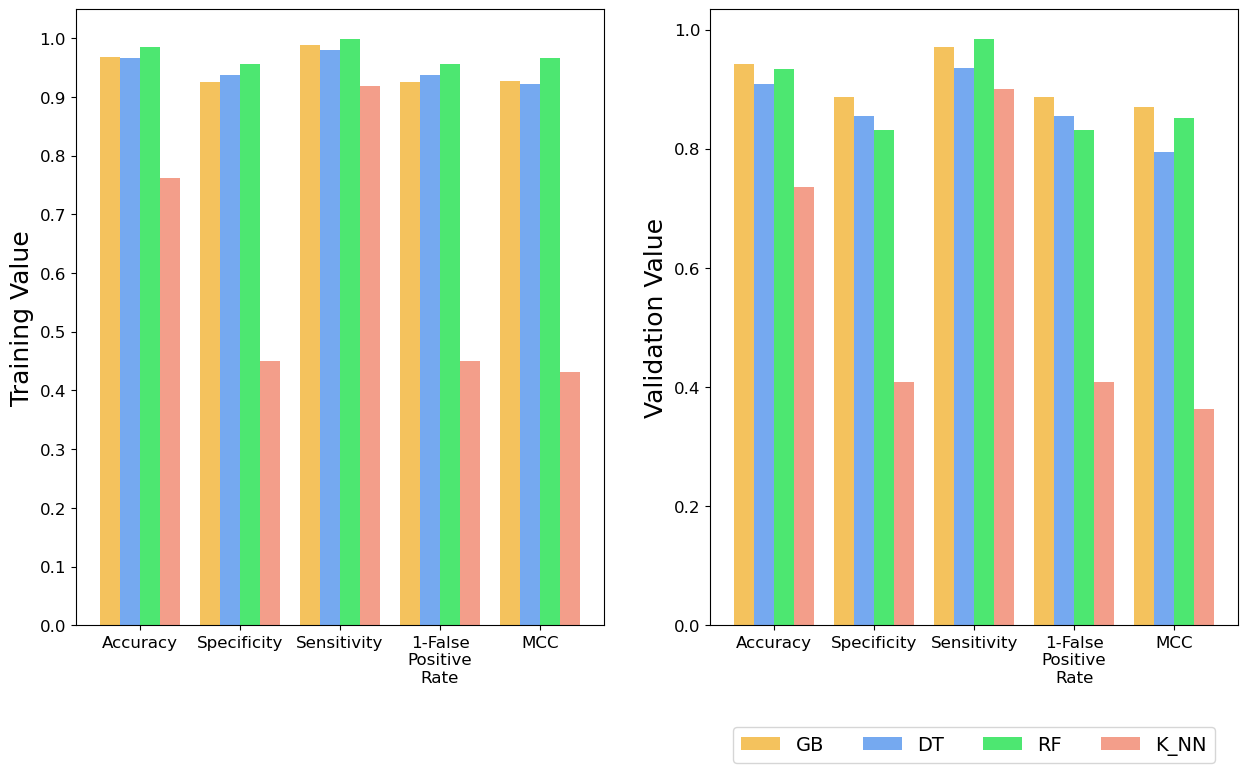

In [253]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(labels))  
width = 0.2  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Colors for the training set
colors_train = ['#3A85EA', '#01DD35', '#F0A818', '#EE7558']


# plot the performance metrics for the training set
rects1 = ax1.bar(x, tree_train_values, width, label='Decision Tree', color=colors_train[0], alpha=0.7)
rects2 = ax1.bar(x + width, forest_train_values, width, label='Random Forest', color=colors_train[1], alpha=0.7)
rects3 = ax1.bar(x - width, gb_train_values, width, label='Gradient_Bossting', color=colors_train[2], alpha=0.7)
rects4 = ax1.bar(x + 2*width, KNN_train_values, width, label='KNeighbors', color=colors_train[3], alpha=0.7)

ax1.set_ylabel('Training Value', fontsize=18)  
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(labels, fontsize=12)  
ax1.tick_params(axis='y', labelsize=12)  
ax1.set_yticks(np.arange(0, max(max(tree_train_values), max(forest_train_values), max(gb_train_values), max(KNN_train_values)) + 0.1, 0.1))

# Colors for the test set
colors_test = ['#3A85EA', '#01DD35', '#F0A818', '#EE7558']

# plot the performance metrics for the test set
rects1 = ax2.bar(x, tree_test_values, width, label='Decision Tree', color=colors_test[0], alpha=0.7)
rects2 = ax2.bar(x + width, forest_test_values, width, label='Random Forest', color=colors_test[1], alpha=0.7)
rects3 = ax2.bar(x - width, gb_test_values, width, label='Gradient_Bossting', color=colors_test[2], alpha=0.7)
rects4 = ax2.bar(x + 2*width, KNN_test_values, width, label='KNeighbors', color=colors_test[3], alpha=0.7)

ax2.set_ylabel('Validation Value', fontsize=18)  
ax2.set_xticks(x + width / 2)
ax2.set_xticklabels(labels, fontsize=12) 
ax2.tick_params(axis='y', labelsize=12)  

# Add legend outside the chart with custom order
plt.legend(handles=[rects3, rects1, rects2, rects4], labels=['GB', 'DT', 'RF', 'K_NN'],
            loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=14)

plt.savefig('Metric_plot_2.png', transparent=True)
plt.show()

In [254]:
#ROC training

In [255]:
from sklearn.metrics import roc_curve, auc

In [256]:
# Predict probabilities for training set
probas_train_tree = grid_search_tree.predict_proba(mlr_X_train_tree)[:, 1]
probas_train_forest = grid_search_forest.predict_proba(mlr_X_train_forest)[:, 1]
probas_train_gb = grid_search_gb.predict_proba(mlr_X_train_gb)[:, 1]
probas_train_KNN = grid_search_KNN.predict_proba(mlr_X_train_KNN)[:, 1]

In [257]:
# Compute ROC curve and AUC for decision tree model
fpr_train_tree, tpr_train_tree, thresholds_train_tree = roc_curve(y_train_tree, probas_train_tree )
roc_auc_train_tree = auc(fpr_train_tree, tpr_train_tree)

In [258]:
# Compute ROC curve and AUC for ramdom forest
fpr_train_forest, tpr_train_forest, thresholds_train_forest = roc_curve(y_train_forest, probas_train_forest )
roc_auc_train_forest = auc(fpr_train_forest, tpr_train_forest)

In [259]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_train_gb, tpr_train_gb, thresholds_train_gb= roc_curve(y_train_gb, probas_train_gb)
roc_auc_train_gb = auc(fpr_train_gb, tpr_train_gb)

In [260]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_train_KNN, tpr_train_KNN, thresholds_train_KNN= roc_curve(y_train_KNN, probas_train_KNN)
roc_auc_train_KNN = auc(fpr_train_KNN, tpr_train_KNN)

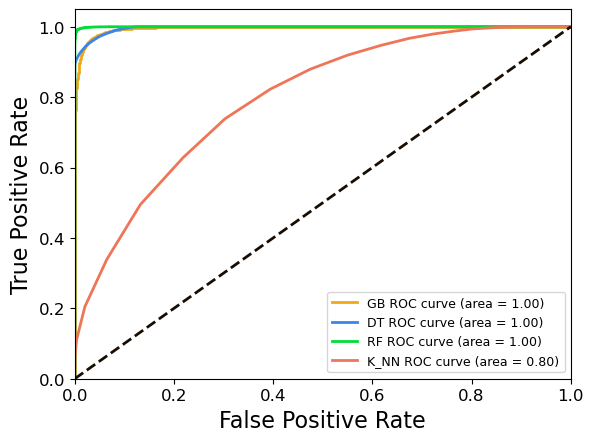

In [261]:
# Plot ROC curves
plt.plot(fpr_train_gb, tpr_train_gb, color='#F0A818', lw=2,label='GB ROC curve (area = %0.2f)' % roc_auc_train_gb)
plt.plot(fpr_train_tree, tpr_train_tree, color='#3A85EA', lw=2, label='DT ROC curve (area = %0.2f)' % roc_auc_train_tree)
plt.plot(fpr_train_forest, tpr_train_forest, color='#01DD35', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_train_forest)
plt.plot(fpr_train_KNN, tpr_train_KNN, color='#EE7558', lw=2, label='K_NN ROC curve (area = %0.2f)' % roc_auc_train_KNN)  # Added KNeighbors ROC
plt.plot([0, 1], [0, 1], color='#170D03', lw=2, linestyle='--')


# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.title('Receiver Operating Characteristic (ROC) - Training Set', fontsize=14)
plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_train.png', dpi=600, transparent=True)
plt.show()

In [262]:
# Curva ROC prediction 

In [263]:
probas_test_tree = grid_search_tree.predict_proba(mlr_X_test_tree)[:, 1]
probas_test_forest = grid_search_forest.predict_proba(mlr_X_test_forest)[:, 1]
probas_test_gb = grid_search_gb.predict_proba(mlr_X_test_gb)[:, 1]
probas_test_KNN = grid_search_KNN.predict_proba(mlr_X_test_KNN)[:, 1]

In [264]:
# Compute ROC curve and AUC for decision tree model
fpr_test_tree, tpr_test_tree, thresholds_test_tree = roc_curve(y_test_tree, probas_test_tree)
roc_auc_test_tree = auc(fpr_test_tree, tpr_test_tree)

In [265]:
# Compute ROC curve and AUC for ramdom forest
fpr_test_forest, tpr_test_forest, thresholds_test_forest = roc_curve(y_test_forest, probas_test_forest )
roc_auc_test_forest = auc(fpr_test_forest, tpr_test_forest)

In [266]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_gb, tpr_test_gb, thresholds_test_gb= roc_curve(y_test_gb, probas_test_gb)
roc_auc_test_gb = auc(fpr_test_gb, tpr_test_gb)

In [267]:
# Compute ROC curve and AUC for Gradient Boosting
fpr_test_KNN, tpr_test_KNN, thresholds_test_KNN= roc_curve(y_test_KNN, probas_test_KNN)
roc_auc_test_KNN = auc(fpr_test_KNN, tpr_test_KNN)

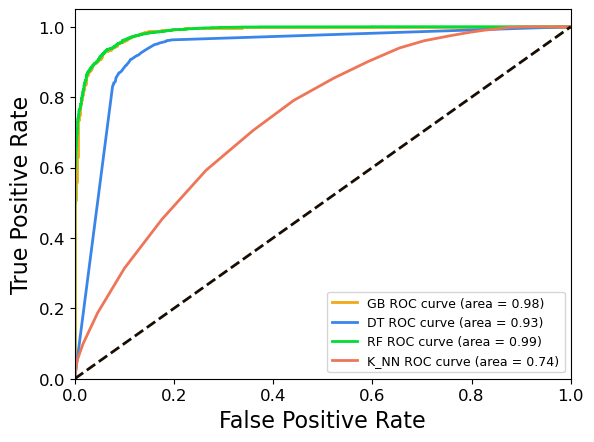

In [268]:
# Plot ROC curves
plt.plot(fpr_test_gb, tpr_test_gb, color='#F0A818', lw=2,label='GB ROC curve (area = %0.2f)' % roc_auc_test_gb)
plt.plot(fpr_test_tree, tpr_test_tree, color='#3A85EA', lw=2, label='DT ROC curve (area = %0.2f)' % roc_auc_test_tree)
plt.plot(fpr_test_forest, tpr_test_forest, color='#01DD35', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_test_forest)
plt.plot(fpr_test_KNN, tpr_test_KNN, color='#EE7558', lw=2, label='K_NN ROC curve (area = %0.2f)' % roc_auc_test_KNN)  
plt.plot([0, 1], [0, 1], color='#170D03', lw=2, linestyle='--')

# Modify letters size of X and Y axes
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Modify number size on X and Y axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.title('Receiver Operating Characteristic (ROC) - Training Set', fontsize=14)
plt.legend(loc="lower right", fontsize=9)

# Save image with transparent background and resolution of 600 dpi
plt.savefig('roc_curve_pred.png', dpi=600, transparent=True)
plt.show()